In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
df = pd.read_csv("student_performance_dataset.csv")
df.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [8]:
df.shape

(708, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [10]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [12]:
df.isnull().sum()

,0
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


In [13]:
df = df.dropna()


In [16]:
X = df.drop('Final_Exam_Score', axis=1)
y = df['Final_Exam_Score']

In [17]:
X = pd.get_dummies(X, drop_first=True)


In [18]:
cleaned_df = X.copy()
cleaned_df["Final_Exam_Score"] = y

cleaned_df.to_csv("cleaned_student_dataset.csv", index=False)


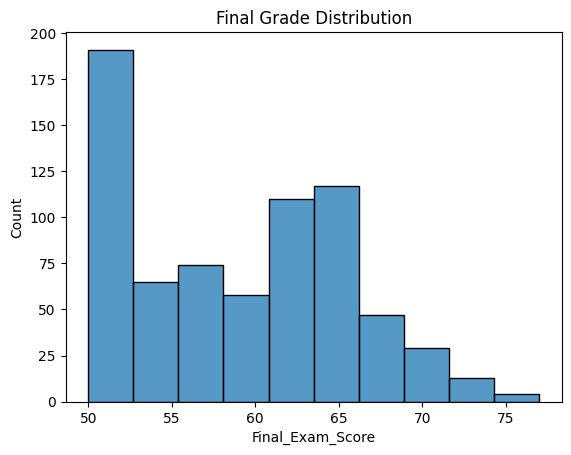

In [19]:
sns.histplot(df['Final_Exam_Score'], bins=10)
plt.title("Final Grade Distribution")
plt.show()


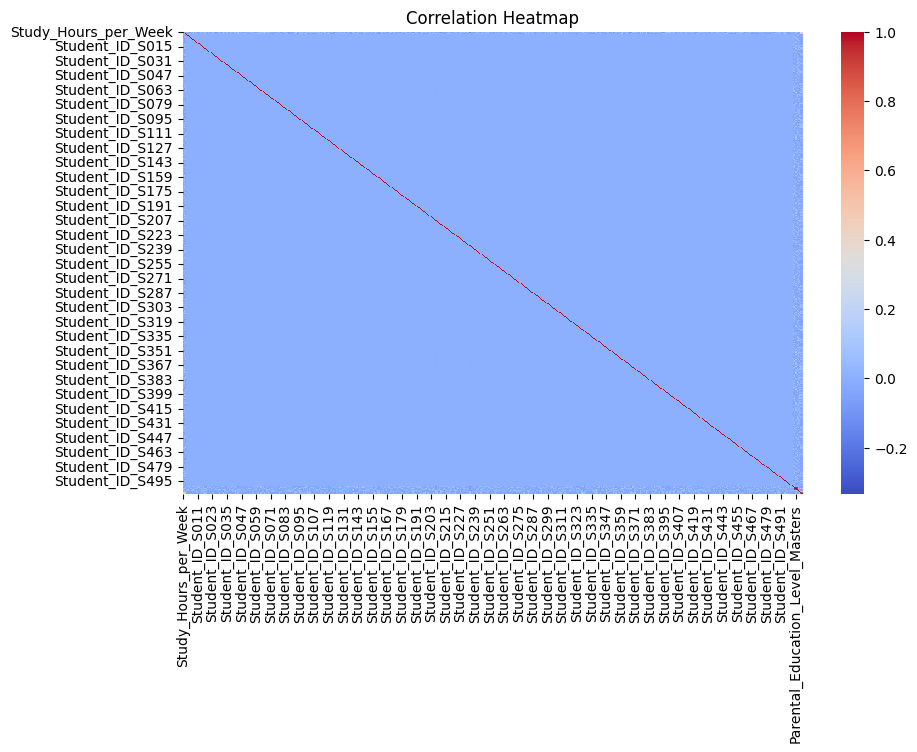

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(cleaned_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))


MAE: 1.42774647887324
R2 Score: 0.9007526636102844
